# Car Racing Game agent with neural network evolved with CMA-ES


In [1]:
using Plots
using Random
using LinearAlgebra
using Statistics

**Le simulateur :**

In [2]:
mutable struct track
    road::Array{Int64}
    ci::Array{Float64}
end

function track(n::Int64)
    init=zeros(3)
    track(zeros(n,n),init)
end

track

In [3]:
function right!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = [h+larg - j for j in 1:larg] #ones(larg)*(h+larg-i)
        end
        pos = pos-1
    end
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = ones(larg)*(h+larg-i)
        end
        pos = pos+n
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = [j for j in h:h+larg-1] #ones(larg)*(h+larg-i)
        end
        pos = pos+1
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = ones(larg)*(h+larg-i)
        end
        pos = pos-n
    end
    
    r[pos]=h
    dir = dir-1
    
    (pos,dir)
end


function left!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = [j for j in h:h+larg-1] #ones(larg)*(h+i)
        end
        pos = pos+(larg)*(n+1)-n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = ones(larg)*(h+i)
        end
        pos = pos-(larg)*(n-1)-1
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = [h+larg - j for j in 1:larg] # ones(larg)*(h+i)
        end
        pos = pos-(larg)*(n+1)+n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = ones(larg)*(h+i)
        end
        pos = pos+(larg)*(n-1)+1
    end
    
    
    r[pos]=h
    dir = dir+1
    
    (pos,dir)
end

function droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,long::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4

    if dir2 == 0
        for i in 0:long-1
            r[pos + i*n : pos + (larg-1) + i*n] = ones(larg)*h
        end
        pos = pos+(long)*n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos - i*n + (long-1)] = ones(long)*h
        end
        pos = pos+long
    end
    
    if dir2 == 2
        for i in 0:long-1
            r[pos - i*n - (larg-1) : pos - i*n] = ones(larg)*h
        end
        pos = pos-(long)*n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (long-1) : pos + i*n] = ones(long)*h
        end
        pos = pos-long
    end
    
    r[pos]=h
    (pos,dir)
end

function long!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    (pos,dir) = short!(tr,pos,dir,larg,h)
    (pos,dir) = short!(tr,pos,dir,larg,h+3)
    (pos,dir) = short!(tr,pos,dir,larg,h+6)
    (pos,dir) = short!(tr,pos,dir,larg,h+9)
end

function short!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h+1)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h+2)
end


short! (generic function with 1 method)

In [4]:
function build!(tr::track,L::Array{Int64})
    pos = 5010
    dir = 100
    tr.road[5001-n] = 1
    larg=6
    
    h = 400
    for i in L
        if i == 1
            (pos,dir) = short!(tr,pos,dir,larg,h)
            h = h + 3
        end
        
        if i == 2
            (pos,dir) = long!(tr,pos,dir,larg,h)
            h = h + 12
        end
        
        if i == 3
            (pos,dir) = right!(tr,pos,dir,larg,h)
            h = h+larg
        end
        
        if i == 4
            (pos,dir) = left!(tr,pos,dir,larg,h)
            h = h+larg
        end
        h = h + 1
    end
end

build! (generic function with 1 method)

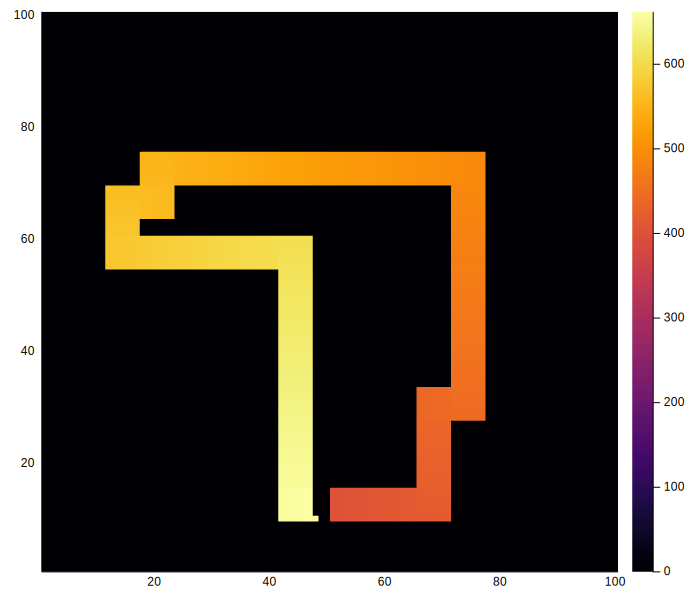

In [5]:
n = 100

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]


build!(track1,L)
plot(heatmap(track1.road),size=(700,600))

In [6]:
mutable struct car
    x::Float64
    y::Float64
    v::Float64
    angle::Float64
    a::Float64
    braq::Float64
    vmax::Float64
end

function car(x::Float64,y::Float64,angle::Float64)
    car(x,y,0,angle,5,3,20) #angle CI
end

car

In [131]:
function move!(Car::car,input::Int64,dt::Float64)
    delta = Car.v*dt
    
    if input == 1 || input == 2 || input == 8
        if Car.v<Car.vmax
            delta = delta + 0.5*Car.a*(dt^2)
            Car.v = Car.v + Car.a*dt
        end
    end
    
    if input == 4 || input == 5 || input == 6
        if Car.v>0
            delta = delta - 2*0.5*Car.a*(dt^2)#facteur 2
            Car.v = Car.v - 2*Car.a*dt #facteur 2
        end
    end
    
    if input == 2 || input == 3 || input == 4
        braqv = Car.braq*(1 + 3*Car.v/Car.vmax)
        Car.angle = Car.angle - delta/braqv
    end
    
    if input == 6 || input == 7 || input == 8
        braqv = Car.braq*(1 + 3*Car.v/Car.vmax)
        Car.angle = Car.angle + delta/braqv
    end
    
    Car.x = Car.x + cos(Car.angle)*delta
    Car.y = Car.y + sin(Car.angle)*delta
end

move! (generic function with 1 method)

**Algorithme CMA-ES :**

In [8]:
mutable struct CMAES
    N::Int
    μ::Int
    λ::Int
    τ::Float64
    τ_c::Float64
    τ_σ::Float64
    population::Array{Array{Float64}}
    offspring::Array{Array{Float64}}
    F_μ::Array{Float64}
    F_λ::Array{Float64}
    C::Array{Float64}
    s::Array{Float64}
    s_σ::Array{Float64}
    σ::Float64
    E::Array{Float64}
    W::Array{Float64}
    x::Array{Float64}
end

In [9]:
function CMAES(;N=2, μ=1, λ=10, τ=sqrt(N), τ_c=N^2, τ_σ=sqrt(N))
    x = randn(N)
    population = fill(x, µ)
    offspring = Array{Array{Float64}}(undef, λ)
    F_µ = Inf .* ones(µ)
    F_λ = Inf .* ones(λ)
    C = Array(Diagonal{Float64}(I, N))
    s = zeros(N)
    s_σ = zeros(N)
    σ = 1.0
    E = zeros(N, λ)
    W = zeros(N, λ);
    CMAES(N, μ, λ, τ, τ_c, τ_σ, population, offspring, F_µ, F_λ, C, s, s_σ, σ, E, W, x)
end

CMAES

Fonction objectif :  
- On met un "-" car CMA-ES minimise la fitness  
- NN sera notre réseau de neurone  
- race() permet de tester le réseau de neurones sur un cicuit   

In [10]:
function objective(genes::Array{Float64},tr::track,maxStep::Int64)
    NN = SimpleNN(genes)
    fit=-race(NN,tr,dt,dx,maxStep)
    fit
end

objective (generic function with 1 method)

À chaque step on évalue les individus en appelant la fonction obj

In [11]:
function step!(c::CMAES, obj::Function,tr::track, maxStep::Int64)
    # L1
    sqrt_c = cholesky((c.C + c.C') / 2.0).U
    for i in 1:c.λ
        c.E[:,i] = randn(c.N)
        c.W[:,i] = c.σ * (sqrt_c * c.E[:,i])
        c.offspring[i] = c.x + c.W[:,i]
        c.F_λ[i] = obj(c.offspring[i],tr,maxStep)
    end
    # Select new parent population
    idx = sortperm(c.F_λ)[1:c.μ]
    for i in 1:c.μ
        c.population[i] = c.offspring[idx[i]]
        c.F_μ[i] = c.F_λ[idx[i]]
    end
    # L2
    w = vec(mean(c.W[:,idx], dims=2))
    c.x += w
    # L3
    c.s = (1.0 - 1.0/c.τ)*c.s + (sqrt(c.μ/c.τ * (2.0 - 1.0/c.τ))/c.σ)*w
    # L4
    c.C = (1.0 - 1.0/c.τ_c).*c.C + (c.s./c.τ_c)*c.s'
    # L5
    ɛ = vec(mean(c.E[:,idx], dims=2))
    c.s_σ = (1.0 - 1.0/c.τ_σ)*c.s_σ + sqrt(c.μ/c.τ_σ*(2.0 - 1.0/c.τ_σ))*ɛ
    # L6
    c.σ = c.σ*exp(((c.s_σ'*c.s_σ)[1] - c.N)/(2*c.N*sqrt(c.N)))
    c
end



step! (generic function with 1 method)

Fonction d'optimization globale :

In [12]:
function CMAES_NNOptimization(nbMaxIter::Int,fitMax::Int,µ::Int64, λ::Int64,tr::track,maxStep::Int64)
    best = nothing
    best_fit = -Inf
    c = CMAES(N=N, µ=µ, λ=λ, τ=sqrt(N), τ_c=N^2, τ_σ=sqrt(N))
    bestind=0
    for i in 1:nbMaxIter
        step!(c, objective, tr, maxStep)
        bestind = argmin(c.F_λ)
        maxfit = -c.F_λ[bestind] 
        println(i, " ", maxfit)
        if maxfit > best_fit
            best = copy(c.offspring[bestind])
            best_fit = maxfit
        end
        if best_fit >= fitMax
            break
        end
    end
    #c.offspring[bestind]
    c.x
end

CMAES_NNOptimization (generic function with 1 method)

**Création du réseau de neurones :**

In [13]:
struct FCLayer
    w::Array{Float64}
    b::Array{Float64}
end

struct SimpleNN
    l1::FCLayer
    l2::FCLayer
    out::FCLayer
end

In [14]:
function SimpleNN(input::Int, N1::Int, N2::Int, output::Int)
    l1 = FCLayer(zeros(N1, input), zeros(N1))
    l2 = FCLayer(zeros(N2, N1), zeros(N2))
    out = FCLayer(zeros(output, N2), zeros(output))
    SimpleNN(l1, l2, out)
end

SimpleNN

- 8 entrées : 7 Distances aux murs, V   
- 6 sorties : accélérer, freiner, Vconstante, tourner à gauche, tourner à droite, tout droit 
- Deux couches cachées de 24 neurones chacunes

In [15]:
n_in =8;
n_l1=24;
n_l2=24;
n_out = 6;
NN = SimpleNN(n_in, n_l1, n_l2, n_out);

Il nous faut donc N genes pour coder notre réseau de neurones, avec :

In [16]:
N=n_in*n_l1+n_l1+n_l1*n_l2+n_l2+n_l2*n_out+n_out

966

Coder les poids et biais à partir de genes : 

In [17]:
function SimpleNN(genes::Array{Float64})
    NN = SimpleNN(n_in, n_l1, n_l2, n_out)
    layers = [NN.l1.w, NN.l1.b, NN.l2.w, NN.l2.b, NN.out.w, NN.out.b]
    L = 1
    j = 1
    for i in eachindex(genes)
        if j > length(layers[L])
            L += 1
            j = 1
        end
        layers[L][j] = genes[i]
        j += 1
    end
    NN
end

SimpleNN

In [18]:
function sigmoid(x::Array{Float64})
    for i in 1:size(x,1)
    x[i]=1/(1+exp(-x[i]))
    end
    x
end

sigmoid (generic function with 1 method)

Déterminer les sorties de notre réseau à partir des entrées :

In [19]:
function compute(inputs::Array{Float64}, NN::SimpleNN)
    x=sigmoid(NN.l1.w * inputs .+ NN.l1.b)
    x = sigmoid(NN.l2.w * x .+ NN.l2.b)
    x = sigmoid(NN.out.w * x .+ NN.out.b)
    x
end

compute (generic function with 1 method)

Example :

In [20]:
genes = randn(N)
NN=SimpleNN(genes)
inputs=zeros(n_in)
compute(inputs,NN)

6-element Array{Float64,1}:
 0.9903864320557662
 0.8453898393506888
 0.009986599677973995
 0.05417195466120734
 0.05124147553009388
 0.014013255381677109

**Communication NN - Simulation :**  
6 sorties :   
O1:accélérer, O2:freiner, O3:Vconstante, O4:tourner à gauche, O5: tourner à droite, O6: tout droit 

In [21]:
function getNNoutput(inputs::Array{Float64}, NN::SimpleNN)
    output=0
    outputs=compute(inputs,NN)
    accel=findmax(outputs[1:3])[2]
    dir=findmax(outputs[4:6])[2]+3 
    if accel ==1 
        if dir == 6
            output= 1
        elseif dir==4
            output=2
        else
            output=8
        end
    elseif accel == 2
        if dir == 6
            output= 5
        elseif dir==4
            output=4
        else
            output=6
        end
            
    elseif accel==3
        if dir == 6
            output= 9
        elseif dir==4
            output=3
        else
            output=7
        end
    end  
    output
end

getNNoutput (generic function with 1 method)

Obtenir les distances aux murs : 

In [159]:
function see1(x::Float64,y::Float64,angle::Float64,dx::Float64,tr::track)
    X = zeros(Int(round(100/dx)))
    Y = zeros(Int(round(100/dx)))
    X[1] = copy(x)
    Y[1] = copy(y)
    if (Int(floor(Y[1]))==0)
        Y[1]+=1
    end
    if (Int(floor(X[1]))==0)
        X[1]+=1
    end
    if (Int(floor(Y[1]))>0 && Int(floor(X[1])) >0)
        value = tr.road[Int(floor(Y[1])),Int(floor(X[1]))]
    end
    #println(X[1],Y[1])
    i = 2
    while value >0
        X[i] = X[i-1] + dx*cos(angle)
        Y[i] = Y[i-1] + dx*sin(angle)
        value = tr.road[Int(round(Y[i])),Int(round(X[i]))]
        i = i+1
    end
    dist = (i-1)*dx
    #(X[1:i-1],Y[1:i-1])
end



see1 (generic function with 1 method)

In [23]:
function see5(Car::car,dx::Float64,tr::track)
    gauche = see1(Car.x,Car.y,Car.angle+pi/2,dx,tr)
    gauche45 = see1(Car.x,Car.y,Car.angle+pi/4,dx,tr)
    devant = see1(Car.x,Car.y,Car.angle,dx,tr)
    droite45 = see1(Car.x,Car.y,Car.angle-pi/4,dx,tr)
    droite = see1(Car.x,Car.y,Car.angle-pi/2,dx,tr)
    (gauche,gauche45,devant,droite45,droite)
end

see5 (generic function with 1 method)

In [24]:
function see7(Car::car,dx,tr::track)
    gauche = see1(Car.x,Car.y,Car.angle+pi/2,dx,tr)
    gauche30 = see1(Car.x,Car.y,Car.angle+pi/6,dx,tr)
    gauche60 = see1(Car.x,Car.y,Car.angle+pi/3,dx,tr)
    devant = see1(Car.x,Car.y,Car.angle,dx,tr)
    droite30 = see1(Car.x,Car.y,Car.angle-pi/6,dx,tr)
    droite60 = see1(Car.x,Car.y,Car.angle-pi/3,dx,tr)
    droite = see1(Car.x,Car.y,Car.angle-pi/2,dx,tr)
    (gauche,gauche30,gauche60,devant,droite60,droite30,droite)
end

see7 (generic function with 1 method)

In [138]:
function see1affichage(x::Float64,y::Float64,angle::Float64,dx::Float64,tr::track) #Retourne deux listes qui permettent de plot la vue de la voiture
    X = zeros(Int(round(100/dx)))
    Y = zeros(Int(round(100/dx)))
    X[1] = copy(x)
    Y[1] = copy(y)
    value = tr.road[Int(floor(Y[1])),Int(floor(X[1]))]
    #println(X[1],Y[1])
    i = 2
    while value >0
        X[i] = X[i-1] + dx*cos(angle)
        Y[i] = Y[i-1] + dx*sin(angle)
        value = tr.road[Int(round(Y[i])),Int(round(X[i]))]
        i = i+1
    end
    (X[1:i-1],Y[1:i-1])
end

function see5affichage(Car::car,dx,tr::track)
    gauche = see1affichage(Car.x,Car.y,Car.angle+pi/2,dx,tr)
    gauche45 = see1affichage(Car.x,Car.y,Car.angle+pi/4,dx,tr)
    devant = see1affichage(Car.x,Car.y,Car.angle,dx,tr)
    droite45 = see1affichage(Car.x,Car.y,Car.angle-pi/4,dx,tr)
    droite = see1affichage(Car.x,Car.y,Car.angle-pi/2,dx,tr)
    (gauche,gauche45,devant,droite45,droite)
end

function see7affichage(Car::car,dx,tr::track)
    gauche = see1affichage(Car.x,Car.y,Car.angle+pi/2,dx,tr)/6
    gauche30 = see1affichage(Car.x,Car.y,Car.angle+pi/6,dx,tr)/50
    gauche60 = see1affichage(Car.x,Car.y,Car.angle+pi/3,dx,tr)/15
    devant = see1affichage(Car.x,Car.y,Car.angle,dx,tr)/100
    droite30 = see1affichage(Car.x,Car.y,Car.angle-pi/6,dx,tr)/50
    droite60 = see1affichage(Car.x,Car.y,Car.angle-pi/3,dx,tr)/15
    droite = see1affichage(Car.x,Car.y,Car.angle-pi/2,dx,tr)/6
    (gauche,gauche30,gauche60,devant,droite60,droite30,droite)
end

see7affichage (generic function with 1 method)

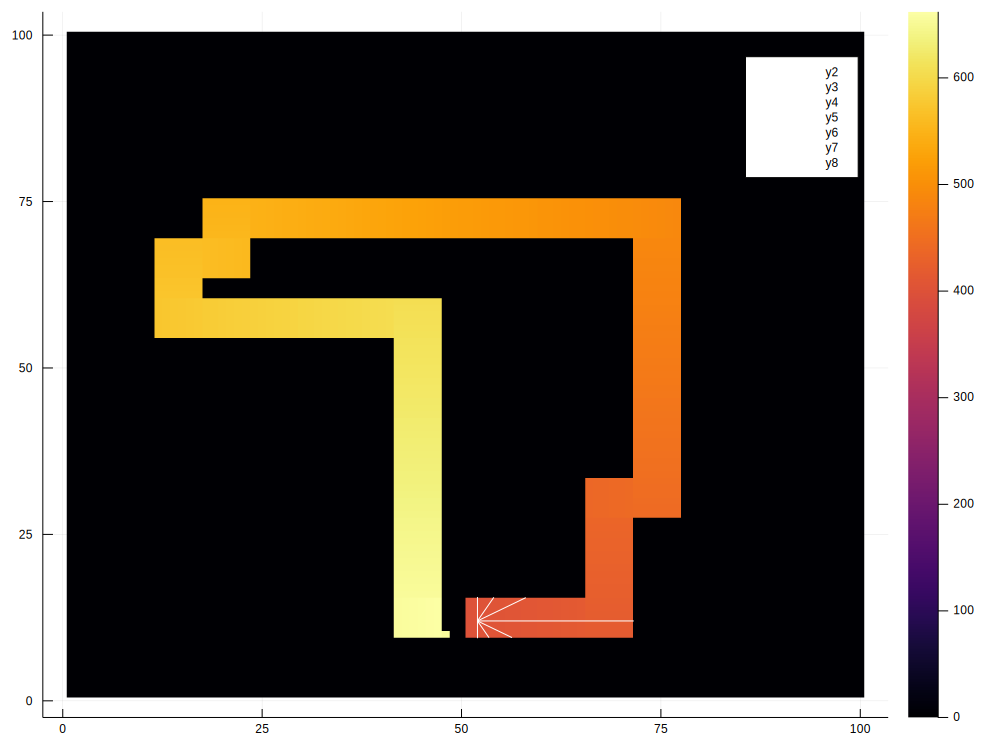

In [26]:
A = see7affichage(car(52.,12.,0.),0.1,track1)

plot(heatmap(track1.road,size = (1000,750)))
plot!(A[1],color = "white")
plot!(A[2],color = "white")
plot!(A[3],color = "white")
plot!(A[4],color = "white")
plot!(A[5],color = "white")
plot!(A[6],color = "white")
plot!(A[7],color = "white")

Obtenir les entrées pour le NN :

In [139]:
function getState(car1::car,dx::Float64,tr::track) 
    inputs=zeros(8)
    #println(see5(car1,dx,tr))
    inputs[1:7].=see7(car1,dx,tr)
    inputs[8]=car1.v/car1.vmax
    #println(inputs)
    inputs
end 

getState (generic function with 1 method)

Fonction pour afficher la progression de la voiture : 

In [28]:
function affichage(X::Array{Float64},Y::Array{Float64},tr::track)
    for i in 1:size(X,1)
        x = Int(round(X[i]))
        y = Int(round(Y[i]))
        if x>0 && y>0
            tr.road[x,y]=150
        end
    end
    plot!(heatmap(tr.road),size=(700,600))
end

affichage (generic function with 1 method)

Example de track :

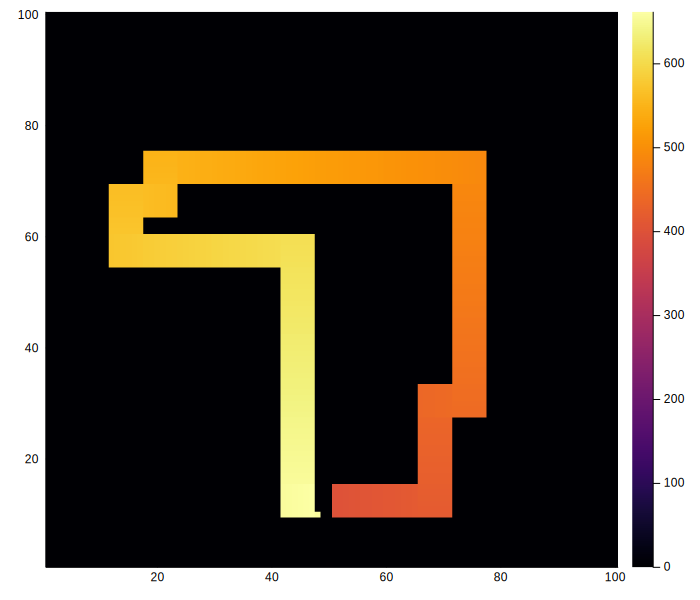

In [29]:
n = 100

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
build!(track1,L)
plot(heatmap(track1.road),size=(700,600))

In [48]:
function race(NN::SimpleNN,tr::track,dt::Float64,dx::Float64,maxStep::Int64)
    tr2 = track(n)
    tr2.road = copy(tr.road)
    X=zeros(maxStep)
    Y=zeros(maxStep)
    plot(heatmap(tr2.road),size=(700,600))
    car1 = car(tr.ci[1],tr.ci[2],tr.ci[3])
    currentState=getState(car1,dx,tr2)
    compteur=1
    fitness=1
    value=1
    while value>0
         fitness=value
         x = Int(round(car1.x))
         y = Int(round(car1.y))
         if x>0 && y>0
             value = tr2.road[y,x]
         end
         X[compteur]=y
         Y[compteur]=x
         move!(car1,getNNoutput((currentState),NN),dt)
         currentState=getState(car1,dx,tr2)
         compteur+=1
         if compteur>=maxStep
            value=0
         end
    end
    affichage(X,Y,tr2)
    fitness 
end

race (generic function with 1 method)

Stratégie d'apprentissage :
- I : on apprend au réseau de neuronne les bases de la conduite sur un circuit simple
- II : on affine le réseau sur deux autres circuits de complexité croissante 
- III : on test sur tout types de cicuits 


407


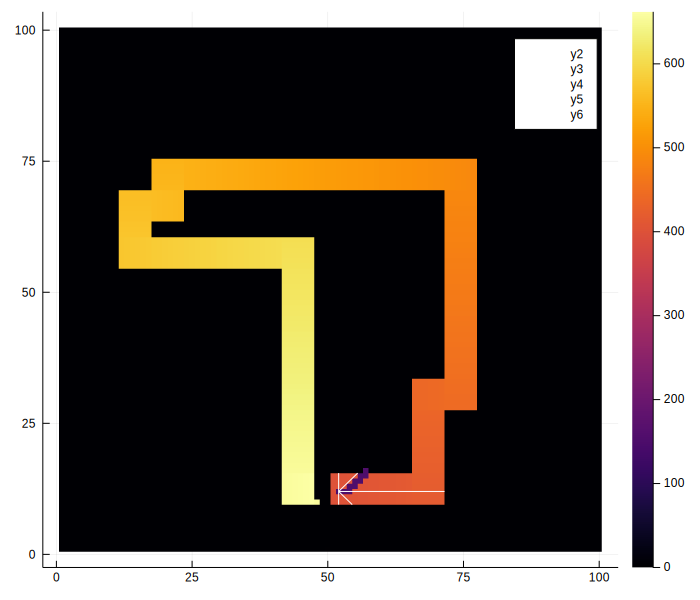

In [31]:
dt=0.06
dx=0.06
n = 100
maxStep=500

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
build!(track1,L)
track1.ci=[52.,12.,-1*pi/180]


genes = randn(N)
NN=SimpleNN(genes)

println(race(NN,track1,dt,dx,maxStep))

A = see5affichage(car(52.,12.,0*pi/180),0.01,track1)
plot!(A[1],color = "white")
plot!(A[2],color = "white")
plot!(A[3],color = "white")
plot!(A[4],color = "white")
plot!(A[5],color = "white")

current()



1 419.0
2 421.0
3 454.0
4 429.0
5 484.0
6 432.0
7 428.0
8 455.0
9 470.0
10 499.0
11 562.0
12 561.0
13 575.0
14 497.0
15 581.0
16 504.0
17 579.0
18 574.0
19 582.0
20 579.0
21 581.0
22 579.0
23 578.0
24 578.0
25 578.0
26 579.0
27 607.0
28 581.0
29 581.0
30 582.0
31 581.0
32 578.0
33 585.0
34 584.0
35 583.0
36 582.0
37 579.0
38 579.0
39 607.0
40 582.0
577


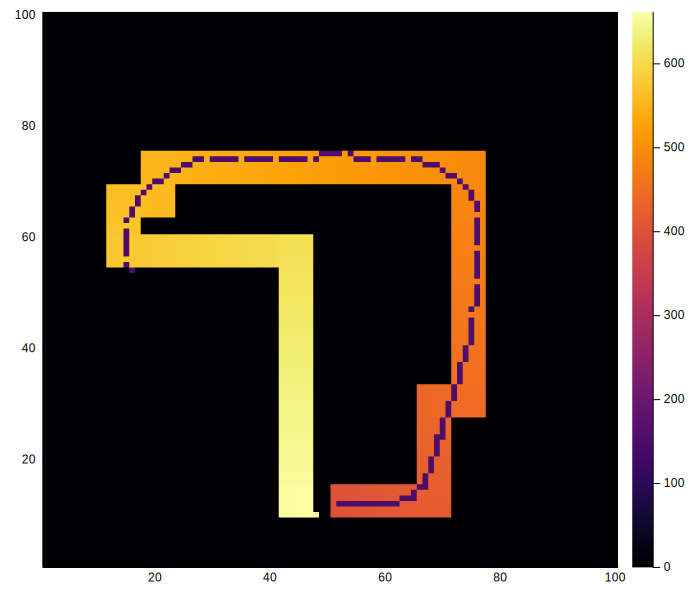

In [40]:
nbMaxIter=40
fitMax=650
maxStep=1000

dx=0.1
dt=0.06
n = 100
µ=8 #mu meilleurs élément créent le nouvel expert
λ=50 #lambda=3*mu  #lambda=pop ? 

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
build!(track1,L)
track1.ci=[52.,12.,0*pi/180]

genes=CMAES_NNOptimization(nbMaxIter,fitMax,µ,λ,track1,maxStep)
NN = SimpleNN(genes)
println(race(NN,track1,dt,dx,maxStep))
current()

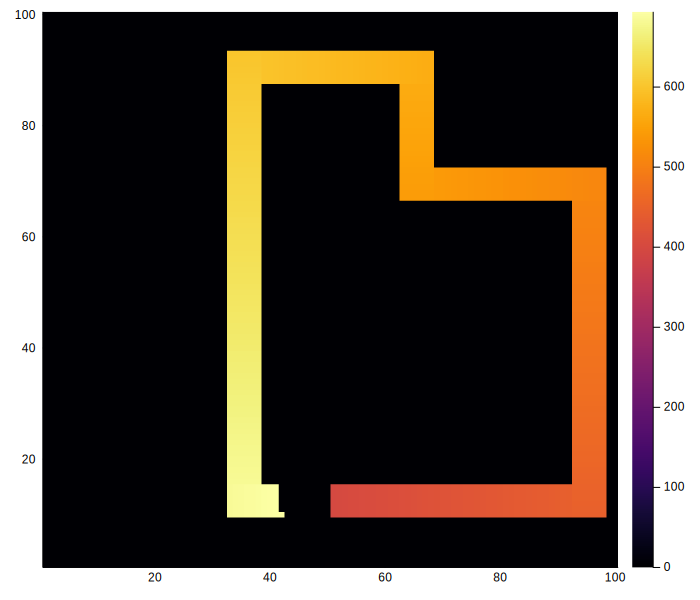

In [33]:
n = 100

track2 = track(n)
L = [1,2,2,2,1,4,1,2,2,2,2,4,2,2,3,2,1,4,2,2,4,2,2,2,2,2,2,4,1]
build!(track2,L)
track2.ci=[52.,12.,0*pi/180]
plot(heatmap(track2.road),size=(700,600))

473


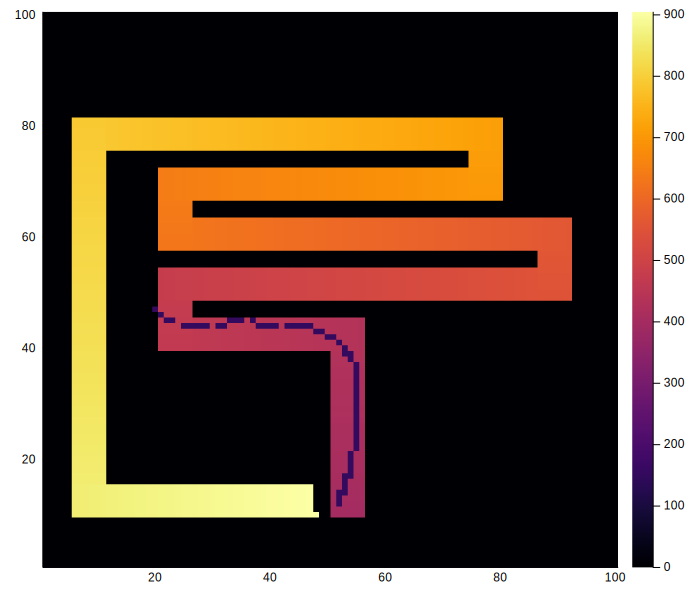

In [108]:
println(race(NN,track4,dt,dx,maxStep))
current()

1 181845.0
421


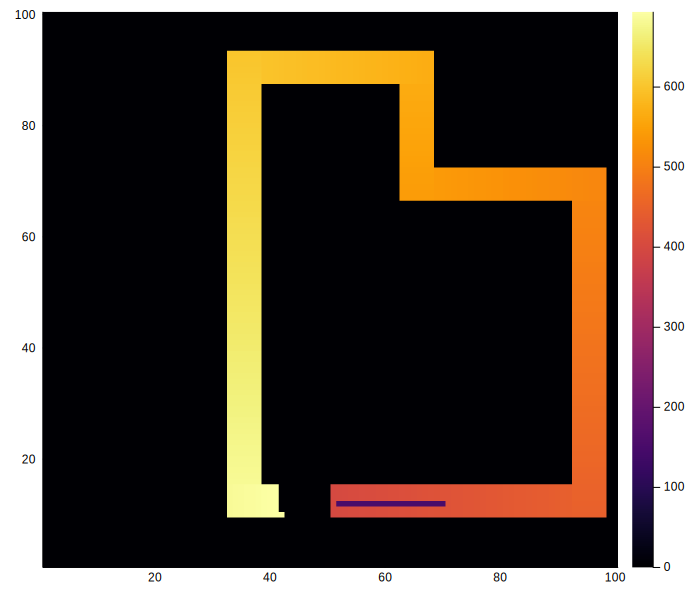

In [52]:
nbMaxIter=30
fitMax=600
maxStep=800

n = 100
µ=8
λ=50

dx=0.1
dt=0.06

track1 = track(n)
L = [1,2,2,2,1,4,1,2,2,2,2,4,2,2,3,2,1,4,2,2,4,2,2,2,2,2,2,4,1]
build!(track2,L)
track1.ci=[52.,12.,0*pi/180]

genes=CMAES_NNOptimization(nbMaxIter,fitMax,µ,λ,track2,maxStep)
NN = SimpleNN(genes)
println(race(NN,track2,dt,dx,maxStep))
current()
#503 max mu=5 lambda = 50  

In [36]:
#normalisation des entrées et fonction neuronale
#ajout de deux inputs
#taille des couches cachées
#paramètres CMAES
#dt dx
#accélération négative max pas assez élevée ? 
#fitness en virage ? prbm ?
#multiplication des fitness de plusieurs circuits/et inversement prop au nombre de pas 

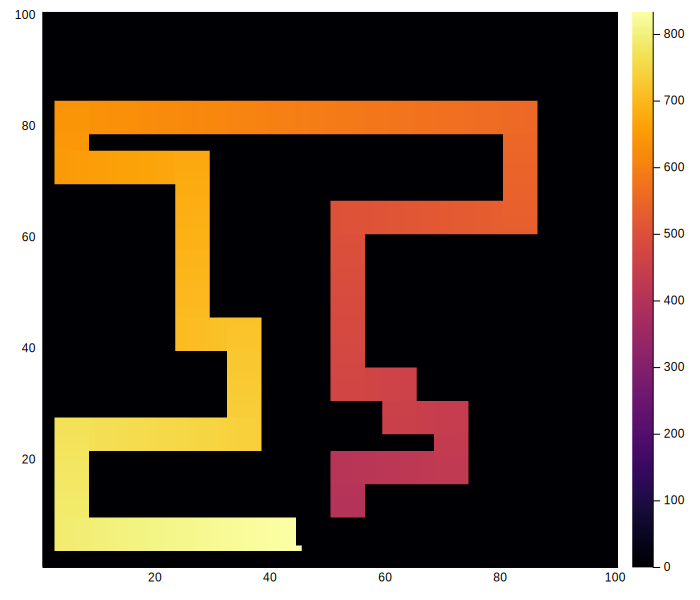

In [74]:
n = 100

track3 = track(n)
L = [4,3,2,4,1,4,1,3,4,1,3,2,2,3,2,2,4,2,4,2,2,2,2,2,2,4,1,4,2,1,3,2,2,4,1,3,2,3,2,2,4,2,4,2,2,2]
build!(track3,L)
track3.ci=[52.,12.,90*pi/180]
plot(heatmap(track3.road),size=(700,600))

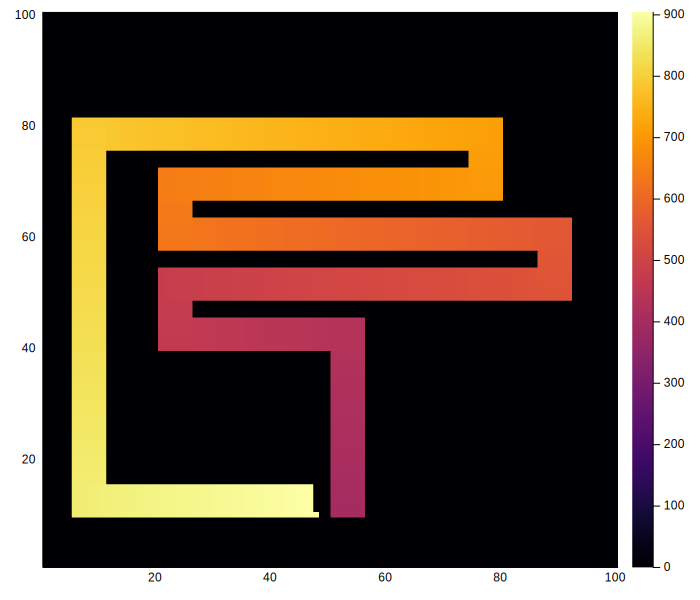

In [100]:
n = 100

track4 = track(n)
L = [4,2,2,4,2,2,3,1,3,2,2,2,2,2,4,1,4,2,2,2,2,2,3,1,3,2,2,2,2,4,1,4,2,2,2,2,2,1,4,2,2,2,2,2,4,2,2,2]
build!(track4,L)
track4.ci=[52.,12.,90*pi/180]
plot(heatmap(track4.road),size=(700,600))

Test avec fitness sur 5 circuits 

In [117]:
function objective(genes::Array{Float64},tr::track,maxStep::Int64)
    NN = SimpleNN(genes)
    fit1=race(NN,track1,dt,dx,maxStep)/100
    fit2=race(NN,track2,dt,dx,maxStep)/100
    fit3=race(NN,track3,dt,dx,maxStep)/100
    fit4=race(NN,track4,dt,dx,maxStep)/100
    fit=-fit1*fit2*fit3*fit4
    fit
end

objective (generic function with 1 method)

In [169]:
nbMaxIter=1000
fitMax=4300
maxStep=1200

n = 100
µ=8
λ=50

dx=0.1
dt=0.06 

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
build!(track1,L)
track1.ci=[52.,12.,0*pi/180]

track2 = track(n)
L = [1,2,2,2,1,4,1,2,2,2,2,4,2,2,3,2,1,4,2,2,4,2,2,2,2,2,2,4,1]
build!(track2,L)
track2.ci=[52.,12.,0*pi/180]


track3 = track(n)
L = [4,3,2,4,1,4,1,3,4,1,3,2,2,3,2,2,4,2,4,2,2,2,2,2,2,4,1,4,2,1,3,2,2,4,1,3,2,3,2,2,4,2,4,2,2,2]
build!(track3,L)
track3.ci=[52.,12.,90*pi/180]

track4 = track(n)
L = [4,2,2,4,2,2,3,1,3,2,2,2,2,2,4,1,4,2,2,2,2,2,3,1,3,2,2,2,2,4,1,4,2,2,2,2,2,1,4,2,2,2,2,2,4,2,2,2]
build!(track4,L)
track4.ci=[52.,12.,90*pi/180]


genes=CMAES_NNOptimization(nbMaxIter,fitMax,µ,λ,track2,maxStep)
NN = SimpleNN(genes)
#fit max 3397 en 257 itérations /40min 

1 335.43004776000004
2 345.70543392
3 372.6509975999999
4 351.87559769999996
5 444.34299168
6 365.1556128
7 471.01498559999993
8 537.5959776000001
9 595.6826718
10 498.51766640000005
11 477.076005
12 612.0108525
13 410.812688
14 476.48198399999995
15 566.97097392
16 559.95826176
17 648.6648600000001
18 590.2870464
19 638.29807
20 634.549538
21 606.5877403800001
22 659.502207
23 597.7567281600001
24 644.2145049599999
25 660.3751584
26 618.9121806000002
27 650.044998
28 648.03373936
29 652.2578972
30 640.85421624
31 653.4503248000001
32 656.927502
33 663.6455061600001
34 647.5367472000001
35 781.67232
36 762.6942124800001
37 648.9144849600001
38 651.282786
39 663.3656467200001
40 658.9550370000001
41 657.50420736
42 663.3656467200001
43 733.6017561599999
44 798.7344393599999
45 652.6592509500001
46 653.3591047200001
47 658.071975
48 655.882321
49 663.4275825
50 671.5758084
51 779.1959172800001
52 772.9286385600001
53 734.8798079999999
54 662.1642499999999
55 665.1216
56 774.62446784
57 6

424 2018.6510602500002
425 2638.0630584
426 2152.12512384
427 2318.5493448
428 2845.3322462399997
429 2225.77239456
430 2219.0519389200003
431 2812.675008
432 2682.82184184
433 2207.7157607999998
434 2203.2695916
435 2460.1145184
436 2165.0138265600003
437 2136.2686488000004
438 1935.1777763999999
439 2224.2108168
440 2364.60287016
441 2262.8387627999996
442 2132.9770176000006
443 2325.1385739599996
444 2238.9491259200004
445 2286.47637726
446 2341.9378568
447 2479.272666
448 2286.47637726
449 2479.2147864
450 2748.7694375400006
451 2314.7050113000005
452 2295.5501812099997
453 2339.58480504
454 2464.0156034399997
455 2467.8298690799998
456 2471.6441347200002
457 2625.5132316
458 2718.8873711999995
459 2446.6452515999995
460 2482.97117244
461 2411.272476
462 2471.6441347200002
463 2475.45840036
464 2468.3245144800003
465 2446.71400656
466 2508.959904
467 2907.1684173
468 2757.8701880000003
469 2614.9773728
470 2461.1906286
471 2832.2020007399997
472 2941.9035165
473 2971.6646814
474 30

832 3092.9314099199996
833 3137.98644912
834 3017.01267246
835 2986.65243702
836 3045.916452
837 3122.5809929399998
838 3155.3642735999997
839 3093.2856503999997
840 3089.5463807999995
841 3177.3158207999995
842 3085.1033597999995
843 3159.12065964
844 3057.3088919999996
845 3028.18616244
846 3227.945292
847 3116.25502788
848 3155.3642735999997
849 3200.8966703999995
850 3205.0249704000003
851 3031.5262823999997
852 3243.2255064
853 3205.5423839999994
854 3125.1611160000007
855 3166.8244343999995
856 3119.7563099999998
857 3198.5530303200003
858 3139.14062172
859 3205.0249704000003
860 3100.7826431999997
861 3239.4054528
862 3160.5202951200004
863 3155.3642735999997
864 3099.1502874800008
865 3218.6428559999995
866 3139.14062172
867 3264.3832553800003
868 3258.50954886
869 3155.3642735999997
870 3188.1704975999996
871 3115.33474224
872 3196.35460632
873 3209.670684
874 3103.037150400001
875 3085.3703232
876 3197.3848631999995
877 3208.845024
878 3228.3306
879 3257.3828565599997
880 332

SimpleNN(FCLayer([-9.961850010070226 -2.0352069004826348 … 9.613184539447731 9.168953877335966; -3.8079057668891636 -1.7112946987783706 … -2.622399849261174 -8.880587233464604; … ; -1.6562904237558675 -5.470743818678987 … 1.2288295784629353 -0.2205632703255166; -1.5222539011006526 2.4089124206966623 … -6.028210018434395 6.775572914670714], [-7.270476682898646, 23.841108625265626, -3.0238185082069418, -12.980697173986247, 3.4846476286062704, 0.9406342322479064, -0.8460076477089082, 10.583494902586818, 12.432703892641852, 7.785030160497076  …  -9.484926741181225, -3.776885537124582, -6.509903832487609, -2.5074858513773344, 5.636092070083783, -0.8043213329037017, 8.121165712965794, -7.978768937460236, -4.543090167470544, -5.007947114801956]), FCLayer([-6.021440437806348 1.6397814619811868 … 9.984646651311868 4.424256482063664; -2.0270196827080436 12.347666838817055 … 16.305121828632775 4.86279477766348; … ; -3.700007659485448 4.489004162350351 … 2.5549678136789704 -5.692467724228645; -6.9

660


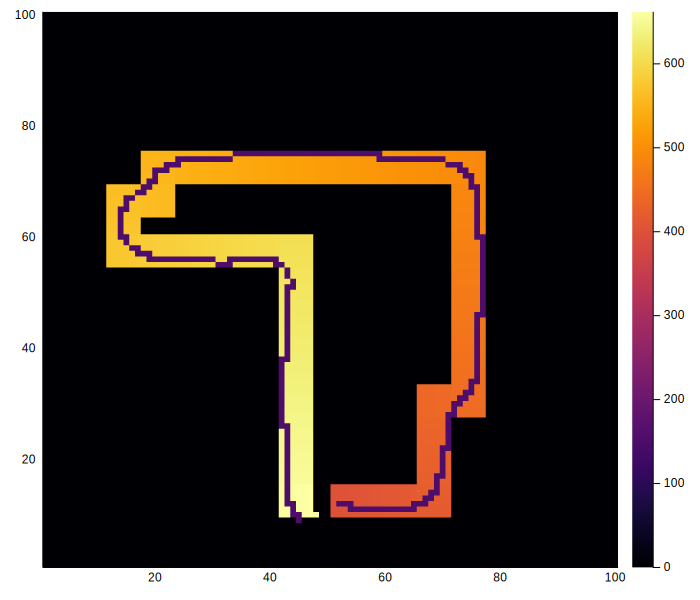

In [170]:
println(race(NN,track1,dt,dx,maxStep))
current()

In [165]:
BestNN=NN

SimpleNN(FCLayer([10.606722551099532 1.4468744893818166 … -3.498806659565861 -7.938178718948309; 3.8922595369938455 1.6419455519516197 … -1.6401849695444128 2.0393832702622676; … ; 0.31719972172381217 2.493386712036141 … -9.71330855587545 -6.262046560290531; -2.085081436950884 -2.1148045539818767 … -1.6975514103229696 7.001879261529318], [3.2634128012373465, 7.944418416232207, -1.4778734282454489, 0.7119170442436679, -1.332186888361698, 8.127386679326541, -5.381842531749148, 3.641835463087875, -1.7672536990717362, -7.35256245671655  …  -10.445889507398306, 0.9481632278250334, -9.787828404409655, 2.513740322409578, 2.938046182094173, 0.3963860529178375, -5.319621363814315, 1.2040129061763831, 4.3160435601610905, -5.647520213353711]), FCLayer([-1.348064947287624 -0.8421220442510189 … -1.8214895617812972 -2.2204818014318652; 11.25892626710372 -5.555952199024542 … -2.1740418395810193 -0.7705059894062933; … ; 4.921180924809849 -4.094596076699154 … 3.908530575554775 6.768324656083476; -6.170

673


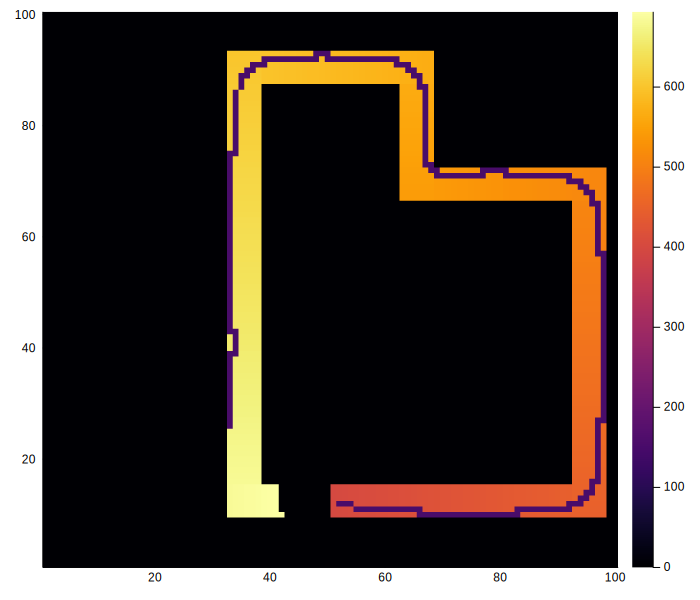

In [171]:
println(race(NN,track2,dt,dx,maxStep))
current()

834


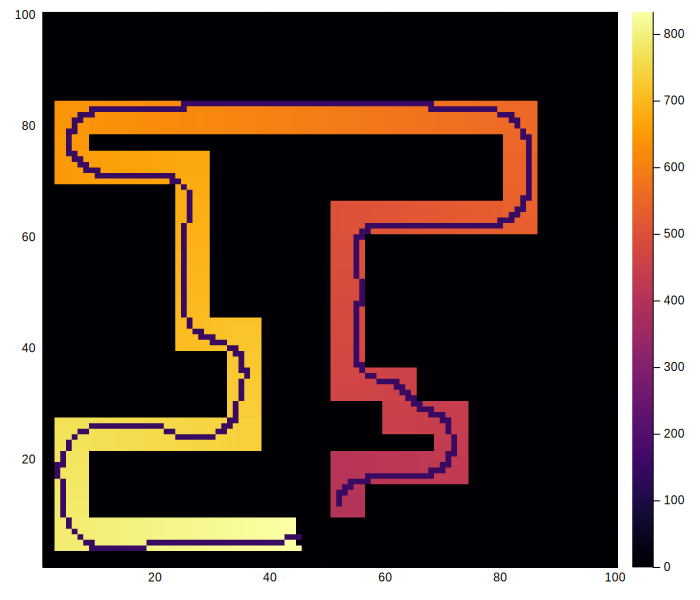

In [172]:
println(race(NN,track3,dt,dx,maxStep))
current()

868


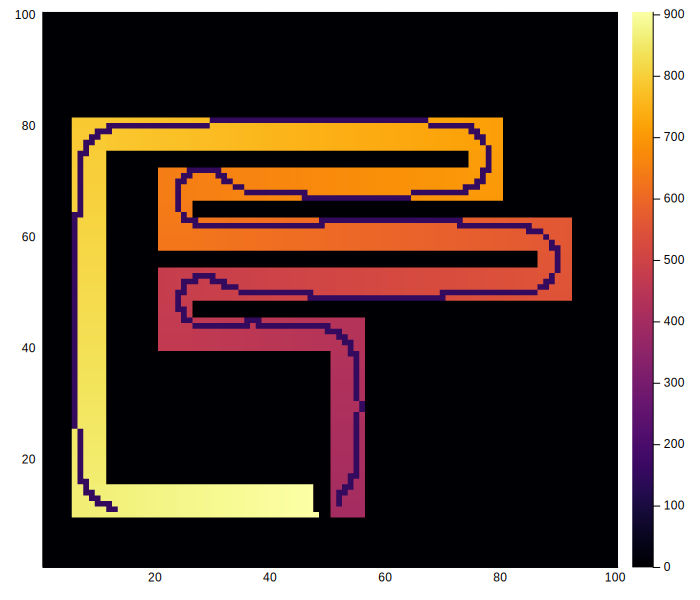

In [173]:
println(race(NN,track4,dt,dx,maxStep))
current()